# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [4]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [29]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [30]:
X = np.array(range(10))
polynomials(X, 3)

array([[   1.,    0.,    0.,    0.],
       [   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.]])

In [43]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

Coefficients: 
 [-1.13334237]
Variance score: 0.46
Residual sum of squares: 1.05
Bias: 0.5513660633286873
Variance: 0.4870022133968702


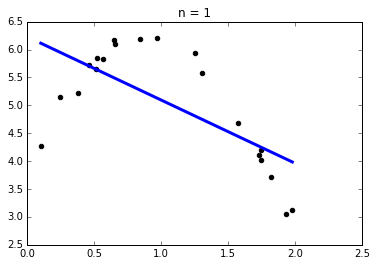

Coefficients: 
 [-0.60110952]
Variance score: 0.65
Residual sum of squares: 1.05
Bias: 0.3562090191903362
Variance: 0.6821592575352213


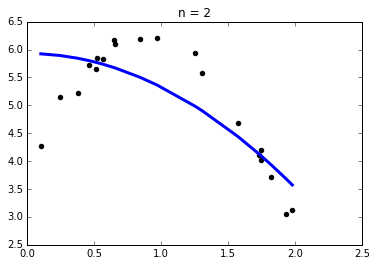

Coefficients: 
 [-0.32851716]
Variance score: 0.75
Residual sum of squares: 1.05
Bias: 0.256345888337408
Variance: 0.7820223883881495


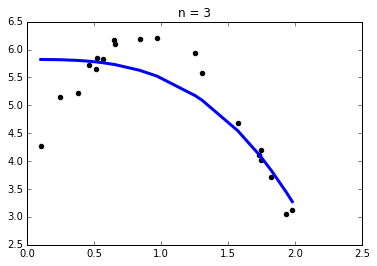

Coefficients: 
 [-0.17695734]
Variance score: 0.79
Residual sum of squares: 1.05
Bias: 0.20996727471505516
Variance: 0.8284010020105024


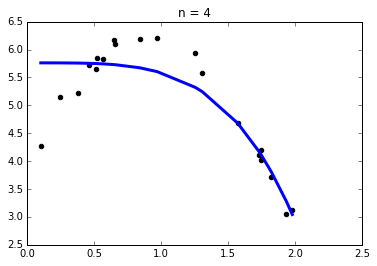

Coefficients: 
 [-0.0937876]
Variance score: 0.81
Residual sum of squares: 1.05
Bias: 0.19418414693862462
Variance: 0.8441841297869329


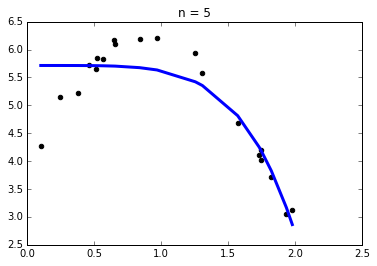

Coefficients: 
 [-0.04905364]
Variance score: 0.80
Residual sum of squares: 1.05
Bias: 0.19650240947689535
Variance: 0.8418658672486622


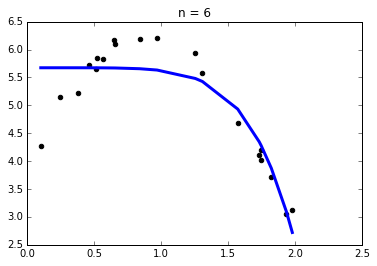

Coefficients: 
 [-0.02539076]
Variance score: 0.79
Residual sum of squares: 1.05
Bias: 0.20981245462359732
Variance: 0.8285558221019602


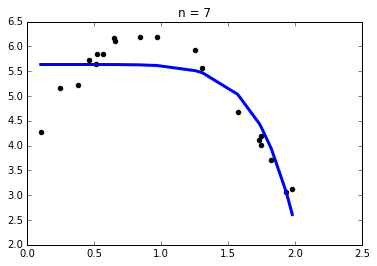

Coefficients: 
 [-0.01303509]
Variance score: 0.77
Residual sum of squares: 1.05
Bias: 0.22982460927608173
Variance: 0.8085436674494758


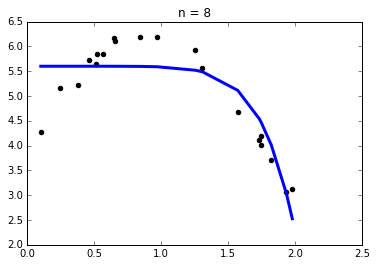

Coefficients: 
 [-0.0066486]
Variance score: 0.75
Residual sum of squares: 1.05
Bias: 0.25378079456547253
Variance: 0.784587482160085


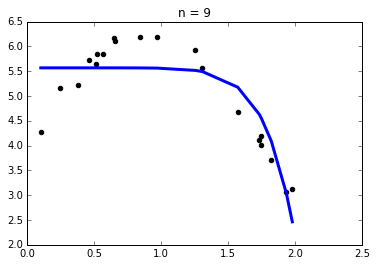

In [47]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

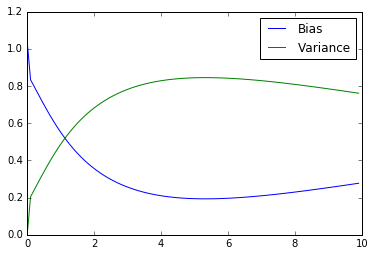

In [48]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

Coefficients: 
 [ 0.         -1.13334237]
Variance score: 0.46
Residual sum of squares: 1.05
Bias: 0.5513660633286867
Variance: 0.4870022133968709


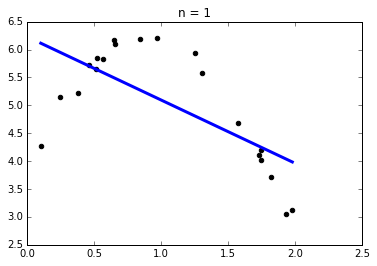

Coefficients: 
 [ 0.          5.04025173 -2.81838625]
Variance score: 0.98
Residual sum of squares: 1.05
Bias: 0.0057873341668510745
Variance: 1.0325809425587065


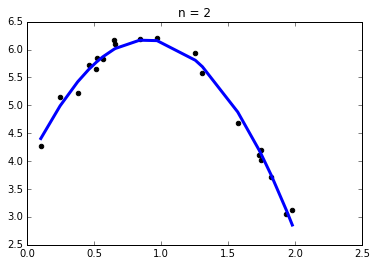

Coefficients: 
 [ 0.          6.05521671 -4.01383376  0.38539602]
Variance score: 0.99
Residual sum of squares: 1.05
Bias: 0.0027086203493957937
Variance: 1.0356596563761618


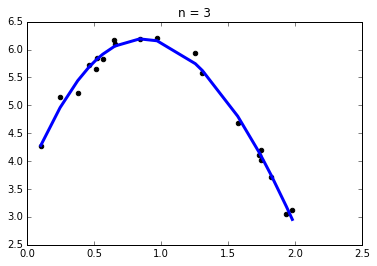

Coefficients: 
 [ 0.          4.61895531 -0.99135726 -1.86249847  0.54187933]
Variance score: 0.99
Residual sum of squares: 1.05
Bias: 0.001254741903774068
Variance: 1.0371135348217835


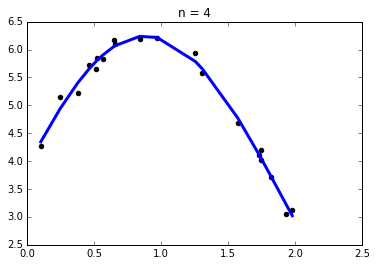

Coefficients: 
 [ 0.          5.53827372 -3.78469712  1.54531452 -1.25098556  0.33948333]
Variance score: 0.99
Residual sum of squares: 1.05
Bias: 0.0011318971607132775
Variance: 1.0372363795648445


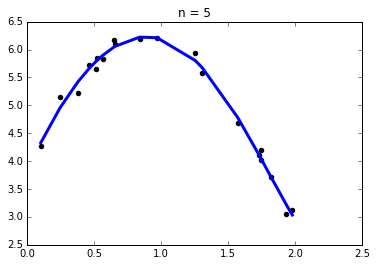

Coefficients: 
 [  0.           8.4730899  -15.944301    23.52823679 -20.57280054
   8.44759626  -1.30057781]
Variance score: 0.99
Residual sum of squares: 1.05
Bias: 0.0008166741330828484
Variance: 1.0375516025924747


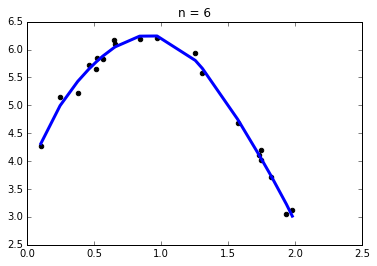

Coefficients: 
 [   0.           17.24238258  -62.15025143  135.73556984 -162.81971815
  105.53585208  -35.06211962    4.68856048]
Variance score: 0.99
Residual sum of squares: 1.05
Bias: -0.00013425513808250876
Variance: 1.03850253186364


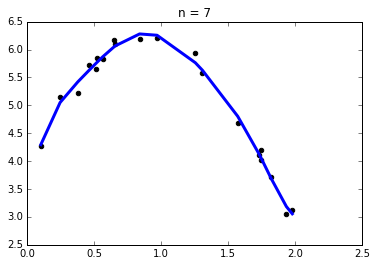

Coefficients: 
 [   0.           24.87534464 -110.10226719  279.89468233 -399.51656953
  329.13578665 -156.21003725   39.64389431   -4.16104391]
Variance score: 0.99
Residual sum of squares: 1.05
Bias: -0.00026713059194193554
Variance: 1.0386354073174995


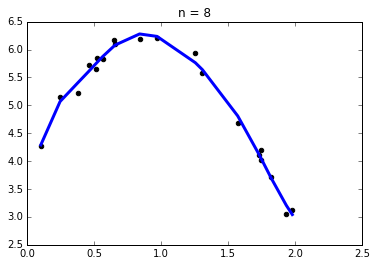

Coefficients: 
 [    0.           111.16736759  -735.03938394  2534.44672143 -5028.09008932
  6070.30372213 -4531.78510455  2040.97936941  -507.70953411    53.53406285]
Variance score: 1.00
Residual sum of squares: 1.05
Bias: -0.005370252850473536
Variance: 1.043738529576031


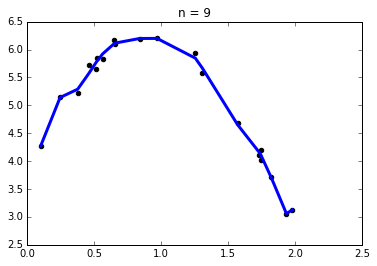

In [45]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

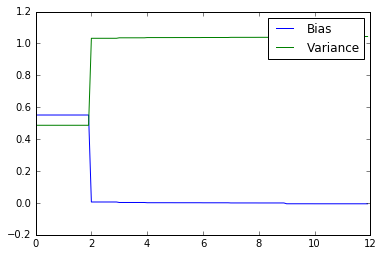

In [49]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investigate the bias and variance as the data source changes in complexity


Coefficients: 
 [ 0.93697432]
Variance score: 0.96
Residual sum of squares: 0.25
Bias: -0.0005577471804335734
Variance: 0.24339567122347697


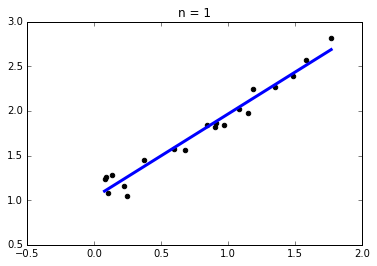

Coefficients: 
 [ 3.88252505]
Variance score: 0.87
Residual sum of squares: 5.24
Bias: 0.6631429289613189
Variance: 4.570159474270605


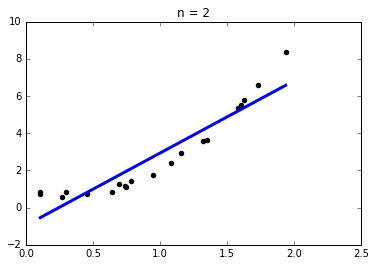

Coefficients: 
 [ 8.84712464]
Variance score: 0.87
Residual sum of squares: 31.06
Bias: 4.09144828164497
Variance: 26.95725670822202


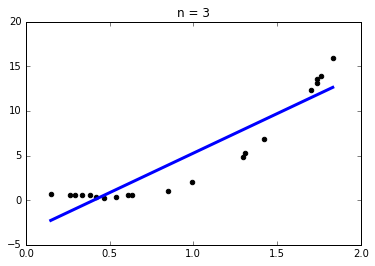

Coefficients: 
 [ 13.37114156]
Variance score: 0.58
Residual sum of squares: 66.19
Bias: 27.468950890526475
Variance: 38.70705136529334


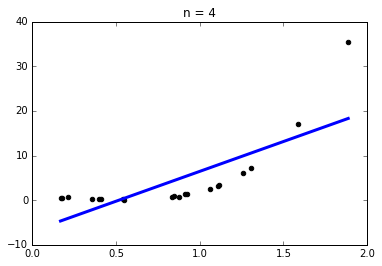

Coefficients: 
 [ 34.0133238]
Variance score: 0.62
Residual sum of squares: 628.65
Bias: 241.43913112673414
Variance: 387.2011793522127


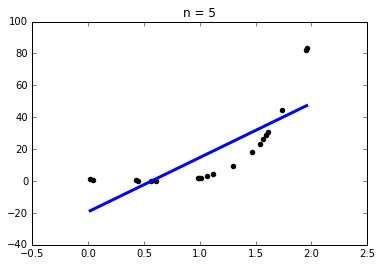

Coefficients: 
 [ 74.13666188]
Variance score: 0.72
Residual sum of squares: 2727.56
Bias: 775.587010288177
Variance: 1951.965468120015


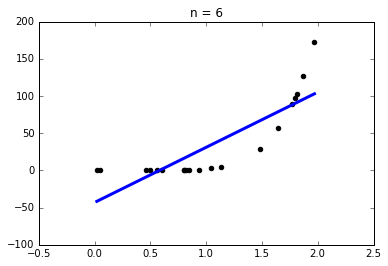

In [52]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

# Individual Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

> Answer: These functions are not polynomial in nature and can be arbitrarily well approximately with a sufficiently large polynomial.

Coefficients: 
 [ 0.         -0.28540622]
Variance score: 0.59
Residual sum of squares: 0.50
Bias: 0.19759894928590455
Variance: 0.29417752267524205


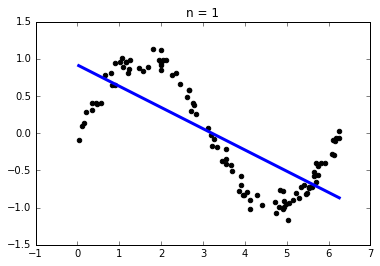

Coefficients: 
 [ 0.         -0.36079078  0.01163448]
Variance score: 0.59
Residual sum of squares: 0.50
Bias: 0.19639650096486344
Variance: 0.29537997099628316


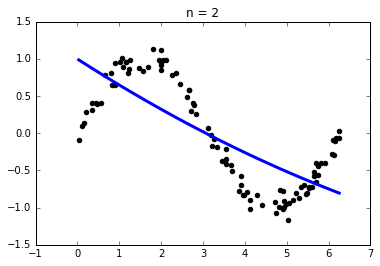

Coefficients: 
 [ 0.          1.91545914 -0.87765675  0.09276419]
Variance score: 0.97
Residual sum of squares: 0.50
Bias: 0.0035232495618552993
Variance: 0.4882532223992913


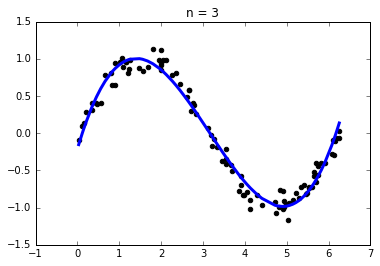

Coefficients: 
 [  0.00000000e+00   2.05781618e+00  -9.77612559e-01   1.17055346e-01
  -1.90181526e-03]
Variance score: 0.97
Residual sum of squares: 0.50
Bias: 0.003300531825978734
Variance: 0.48847594013516776


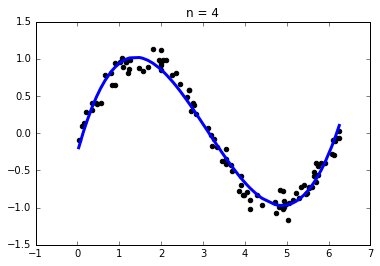

Coefficients: 
 [ 0.          0.92476617  0.27475393 -0.40747083  0.09054722 -0.00579102]
Variance score: 0.98
Residual sum of squares: 0.50
Bias: -0.0016800782736334143
Variance: 0.49345655023478


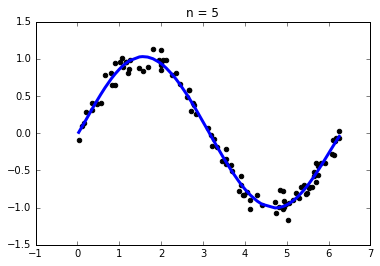

Coefficients: 
 [  0.00000000e+00   9.38346378e-01   2.53183870e-01  -3.93824461e-01
   8.65080849e-02  -5.23047702e-03  -2.94522353e-05]
Variance score: 0.98
Residual sum of squares: 0.50
Bias: -0.001680367399423335
Variance: 0.49345683936056983


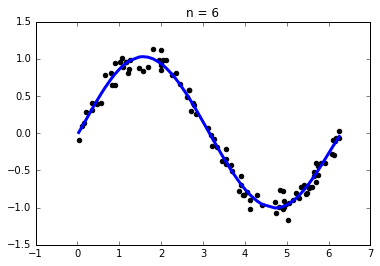

Coefficients: 
 [  0.00000000e+00   1.72806198e+00  -1.39380671e+00   1.02702111e+00
  -5.22562617e-01   1.31882267e-01  -1.55456416e-02   6.95889601e-04]
Variance score: 0.98
Residual sum of squares: 0.50
Bias: -0.0021047228174206813
Variance: 0.4938811947785673


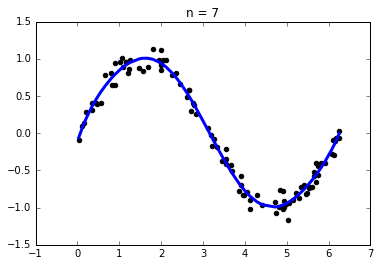

Coefficients: 
 [  0.00000000e+00   1.83427956e+00  -1.68626025e+00   1.36801056e+00
  -7.26331293e-01   1.99397592e-01  -2.80801674e-02   1.91588639e-03
  -4.84481695e-05]
Variance score: 0.98
Residual sum of squares: 0.50
Bias: -0.0021094201531222014
Variance: 0.4938858921142688


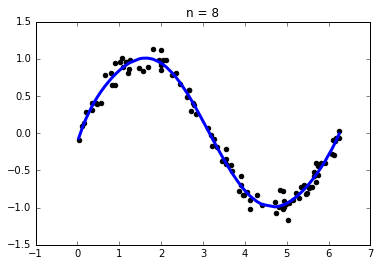

Coefficients: 
 [  0.00000000e+00   1.52245622e+00  -5.86246662e-01  -2.80470853e-01
   5.60295881e-01  -3.76017923e-01   1.24873569e-01  -2.19597323e-02
   1.97167775e-03  -7.14753856e-05]
Variance score: 0.98
Residual sum of squares: 0.50
Bias: -0.0021349671001856165
Variance: 0.4939114390613322


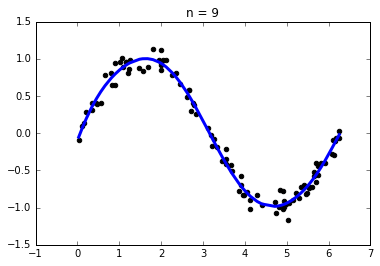

In [51]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

> Answer: This model has high bias.